# Import Library

In [1]:
from src.predict import *
from IPython.display import Image

# Define Backbone Model - Resnet50

In [2]:
model = resnet50()
print('load model...')
model.load_state_dict(torch.load('model/best_resnet50.pth'))

model.eval()
model.cuda()

load model...


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Prediction

In [3]:
image_name = 'assets/VOCTrainVal/VOC20072012/JPEGImages/2012_004331.jpg'
image = cv2.imread(image_name)
result = predict_gpu(model,image_name)

print('predicting...')
print("image path: {p}\n".format(p=image_name))
print("Total number of bbox: {bbox}".format(bbox=len(result)))

for left_up,right_bottom,class_name,_,prob in result:
    print('===================================================================================')
    print("bbox: {lu}, {rb}".format(lu=left_up,rb=right_bottom))
    print("class: {c}".format(c=class_name))
    print("precision: {pr}".format(pr=prob))
    color = Color[VOC_CLASSES.index(class_name)]
    cv2.rectangle(image,left_up,right_bottom,color,2)
    label = class_name+str(round(prob,2))
    text_size, baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)
    p1 = (left_up[0], left_up[1]- text_size[1])
    cv2.rectangle(image, (p1[0] - 2//2, p1[1] - 2 - baseline), (p1[0] + text_size[0], p1[1] + text_size[1]), color, -1)
    cv2.putText(image, label, (p1[0], p1[1] + baseline), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1, 8)

cv2.imwrite('result/result_resnet50.jpg',image)
Image(filename='result/result_resnet50.jpg')

AttributeError: 'NoneType' object has no attribute 'shape'

# Define Backbone Model - VGG16_BN

In [4]:
model = vgg16_bn()
print('load model...')
model.load_state_dict(torch.load('model/best_vgg16_bn.pth'))

model.eval()
model.cuda()

load model...


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

predicting...
image path: assets/VOCTrainVal/VOC20072012/JPEGImages/2012_004331.jpg

Total number of bbox: 4
bbox: (111, 14), (238, 245)
class: person
precision: 0.4453963041305542
bbox: (221, 173), (470, 332)
class: person
precision: 0.40227267146110535
bbox: (281, 189), (412, 308)
class: person
precision: 0.20466043055057526
bbox: (118, 45), (203, 204)
class: person
precision: 0.15082217752933502


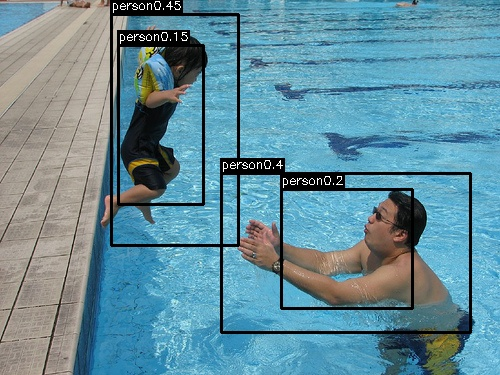

In [5]:
image_name = 'assets/VOCTrainVal/VOC20072012/JPEGImages/2012_004331.jpg'
image = cv2.imread(image_name)
result = predict_gpu_vgg(model,image_name)

print('predicting...')
print("image path: {p}\n".format(p=image_name))
print("Total number of bbox: {bbox}".format(bbox=len(result)))

for left_up,right_bottom,class_name,_,prob in result:
    print('===================================================================================')
    print("bbox: {lu}, {rb}".format(lu=left_up,rb=right_bottom))
    print("class: {c}".format(c=class_name))
    print("precision: {pr}".format(pr=prob))
    color = Color[VOC_CLASSES.index(class_name)]
    cv2.rectangle(image,left_up,right_bottom,color,2)
    label = class_name+str(round(prob,2))
    text_size, baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)
    p1 = (left_up[0], left_up[1]- text_size[1])
    cv2.rectangle(image, (p1[0] - 2//2, p1[1] - 2 - baseline), (p1[0] + text_size[0], p1[1] + text_size[1]), color, -1)
    cv2.putText(image, label, (p1[0], p1[1] + baseline), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1, 8)

cv2.imwrite('result/result_vgg16_bn.jpg',image)
Image(filename='result/result_vgg16_bn.jpg')